# Preprocessing and EDA

### Goal of the project : build a machine learning model that is useful as a screening tool for predicting strokes, meaning that we will focus on detecting as many strokes as possible even if it will lead to a lot of false positives.

In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [31]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [32]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Preprocessing

Removing id col

In [33]:
df = df.drop('id',axis=1)

In [34]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<Axes: xlabel='bmi', ylabel='Count'>

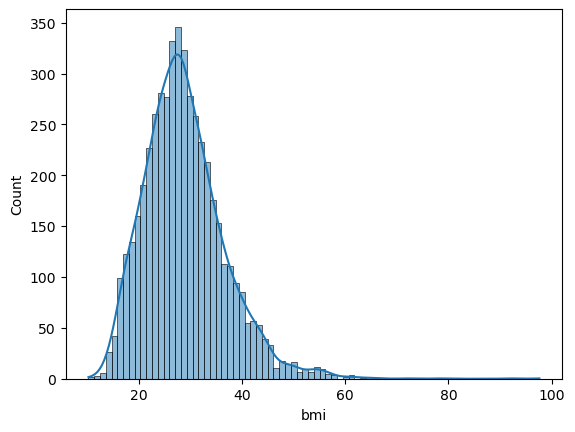

In [36]:
sns.histplot(data=df,x='bmi',kde=True)

 Normally distribiuted variable, filling the missings with mean seems resonable

In [37]:
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(value=mean_bmi)

In [38]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [39]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [40]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Only one row with gender other, will be dropped

In [41]:
df = df[df['gender'] != 'Other']

### All missing data filled

### EDA

<Axes: xlabel='stroke', ylabel='count'>

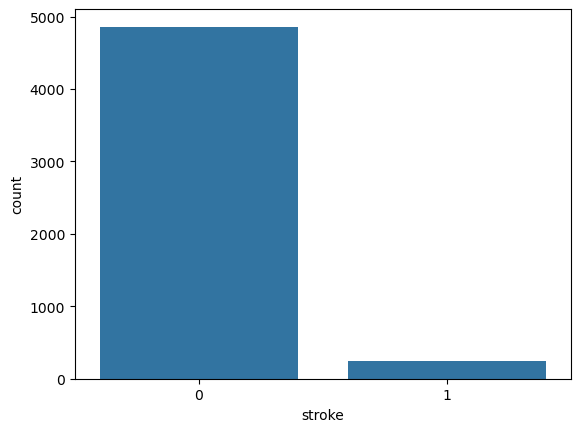

In [42]:
sns.countplot(data=df,x='stroke')

Highly imbalanced target variable

In [43]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

<Axes: xlabel='smoking_status'>

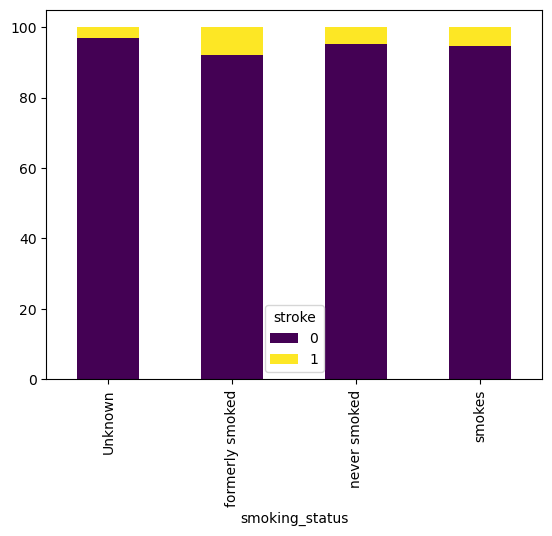

In [44]:
stroke_pct = df.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack() * 100
stroke_pct.plot(kind='bar', stacked=True, colormap='viridis')

In [49]:
stroke_pct

stroke,0,1
smoking_status,,
Unknown,96.955959,3.044041
formerly smoked,92.081448,7.918552
never smoked,95.243129,4.756871
smokes,94.676806,5.323194


Intrestingly the relative stroke risk is the highest in people who formerly smoked rather than thpse who currently smoke.
Also the unknown group has the lowest relative risk, which suggest that this group consists primarly of non-smokers.

Note: Might be worth to preprocess unknown 

##### Now lets look at how does it compare between genders

<Axes: xlabel='gender'>

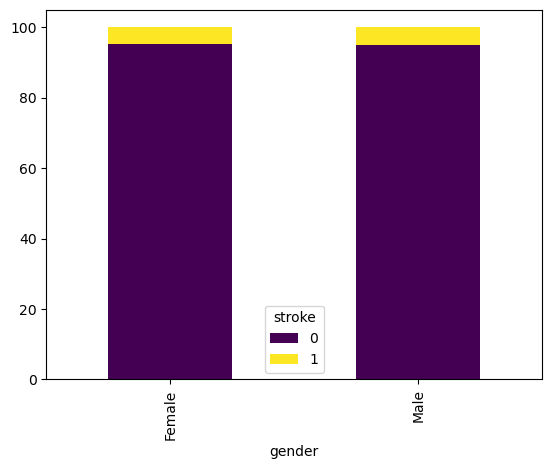

In [45]:
stroke_pct_gender = df.groupby('gender')['stroke'].value_counts(normalize=True).unstack() * 100
stroke_pct_gender.plot(kind='bar', stacked=True, colormap='viridis')

In [46]:
stroke_pct_gender

stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383


Marginally higher risk of stroke in males

##### Bmi and glucose levels for stroke

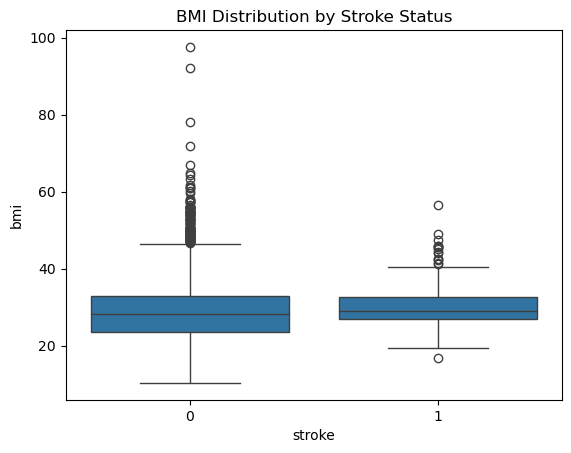

In [47]:
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Distribution by Stroke Status')
plt.show()

Bmi is slightly higher for those who had a stroke, however there are a lot of outliers

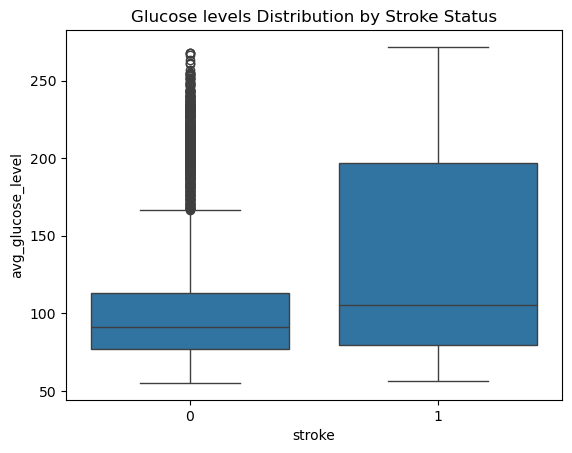

In [48]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose levels Distribution by Stroke Status')
plt.show()

We can observe significantly higher glucose levels in stroke victims, intrestingly this suggest that there is no strong relation between bmi and glucose levels

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

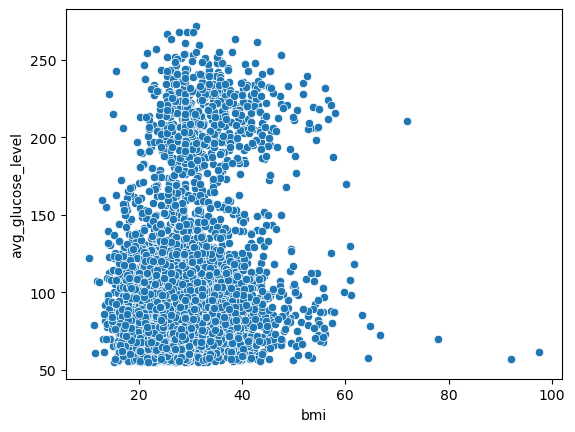

In [51]:
sns.scatterplot(data=df,x='bmi',y='avg_glucose_level')

There doesn't seem to be a strong correlation

In [61]:
r, p = pearsonr(df['bmi'], df['avg_glucose_level'])

print(f"Pearson correlation: {r:.3f}")
print(f"P-value: {p:.5f}")

Pearson correlation: 0.169
P-value: 0.00000


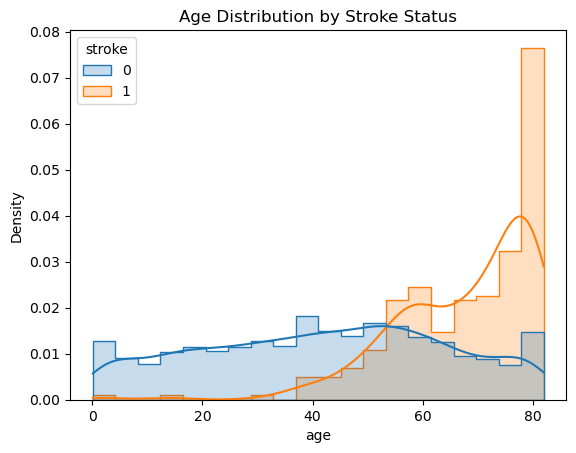

In [50]:
sns.histplot(data=df, x='age', hue='stroke', kde=True, element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Stroke Status')
plt.show()

In [63]:
df.to_csv('preprocessed_data.csv')